- **AUC**

- **Precision Recall Curve**

- **Cheat sheet for which metric to use when**

- **Performance metric vs loss functions**

# **ROC (Reciever Operating Characterstic Curve)**

The term ROC comes from electronics and radio engineering

- One of the beautiful application of this in second world war for detection of planes and ships
- usually used in signal procressing

Now, let's try to understand ROC in terms of ML

### Intuition
Imagine we have a binary classification (class 0/1)

If we want to measure how well a model is performing, we use metric called AU - ROC i.e. Area Under ROC curve a.k.a AUC (Area under curve)

<img src='https://drive.google.com/uc?id=1756dJy7wez6-vrOjBwKyUrtEA-1ZBJNF'>


Let's say we have some test data with
- n datapoints of d dimensions $x_i$
- actual class labels $y_i$
- predicted probability $ŷ_i$

We sort the datapoints using the probability score in desc. order

#### Question: If i have n datapoints of d- dim, what will be the time complexity of sorting ?a

Ans: $n.log(n)$

<img src='https://drive.google.com/uc?id=1SOvwOtshJxESOfLDEGmDOEmIJoszNtPq'>


After sorting the datapoints by predicted probability,

- We set each $ŷ_i$ as threshold ($τ_i$) and classify as
 - If $ŷ_i > τ_i$ then classify as 1, else 0.
 - let these be $ỹ_{τ_i}$
- continue doing the same for all $ŷ_i$ values.
- Now calculate True Positive Rate$_i$ (TPR$_i$ ) and False Positive Rate$_i$  (FPR$_i$ ) for  $y$ and $ỹ_{τ_i}$

<img src='https://drive.google.com/uc?id=1I2tEAlrldB2q_VlXRoQpAagGYGoR1ocz'>


For example:

Let $τ_1$ = 0.95
- We then calculate $ỹ_{τ_1}$
    - 1 , if $ŷ_i$ ≥ $τ_1$
    - 0, otherwise

Then we calculate $TPR_1$ and $FPR_1$ using y and $ŷ_{τ_1}$

Similarly, we calulate $TPR_2$ and $FPR_2$ using y and $ŷ_{τ_2}$

<img src='https://drive.google.com/uc?id=1lzGDOBUKZ6Zkrumct3KdeZM5Hb_jn0Hy'>



Now, after calculating TPR and FPR for each threshold, we'll get n pairs of TPR and FPR

Using these TPR and FPR, we plot the graph between all TPR 𝑖  and FPR 𝑖  as we have  𝑛  pairs of TPR and FPR's

#### Question: What will be the best score for TPR?
Ans: 1 .when TP = P i.e. No False Negatives TPR = TP/P

#### Question: What will be the best FPR?
Ans: 0 (when there are no false positives) FPR = FP/ N

A model with TPR = 1 and FPR = 0 will be best model.




For plotting, we'll have TPR on y axis and FPR on x- axis


However, for a good model,
- we tend to have a curve
- This curve is made using pairs of TPRs and FPRs we calculated earlier

#### Why is curve starting at (0,0)?
Since we are classifying all the points as 0 except 1 point for first threshold (0.95), the TPR as well as FPR will be 0


### Why is right end of curve at (1,1) ?
For n-th threshold, we are classifying every point as class 1.

Since all the points are being precdicted as positive point
- Hence, TPR will 1 as all actual positive are predicted as positive
- Also, FPR will be 1 as all negative points are classifed as positive as well.

<img src='https://drive.google.com/uc?id=1_KJr4Cpueij5rgKIVgnztyuvcydJkgxD'>

# **AUC**

Now that we have got our curve, we find the Area Under the ROC Curve (AU-ROC or AUC) (green shaded area)

<img src='https://drive.google.com/uc?id=10o4Vze5KjRRTZwF2B_37qQcV96mMlbiE'>


#### Question: What will be the AU-ROC for best model ?
The curve for best model will pass through best model point (0,1) and it'll have an AUC of 1.

#### What will be the AUC for worst model?
The curve for worst model will pass through (1,0) and it'll have an AUC of 0.

Let's say we have two models
- Model A (blue curve)
- Model B (cyan curve)

### **Which model is better? A or B ?**

As the curve move away from (1,0) and towards (0,1), the model gets better
- As curve move towards (0,1), AUC increases.

AUC of Model B > Model A. Hence Model B is better

<img src='https://drive.google.com/uc?id=1wL3mrCSOvtxfblLQqfHsm86X024JL467'>


# **Fundamental difference between previous metrics and AUC**

When we calcualte Precision, Recall or F1 score
- We calculate it for a certrain threshold on $ŷ_i$
- This threshold is 0.5, by deafult

On the otherhand, AU-ROC
- we are calculating it using all possible thresholds


When we are comparing Model A and Model B, we are comparing it across all the thresholds and Model B is better than Model A across all the thresholds




<img src='https://drive.google.com/uc?id=1yH4MGscx15Riy8jjVscp-k3tyMsNiY5L'>


## **AUC for random model**

Let's say we have a random model i.e. $ŷ_i$ is randomly generated

#### Question: How will the ROC curve for random model look?

Ans: It will be a diagonal

#### What will be the AUC of random model?

Ans: 0.5

#### (FAANG) Question: Why the AUC of random model 0.5 ?

We can see from the curve TPR$_i$ and FPR$_i$ ∀ τ$_i$.

Why will the TPR = FPR for random model?

Let's try to understand it.

We know that, for random model
- $ŷ_i$ will be randomly generated
- if we sort $ŷ_i$ in decreasing order, it'll be same as jumbling up the $y_i$.







<img src='https://drive.google.com/uc?id=1EvpiW7sB7H6m8exbTfw5zd6VHwsm5K-i'>


Now, when we randomly jumble up the $y_i$
- Assuming we have equal number of class 0 and class 1 in $y_i$
- P = n/2
- N = n/2

For $i^{th}$ threshold ($τ_i$),
- We'll get k TP points
- k FP points as points are randomly jumbled up

TPR = $TP/P$ = $k /(n/2)$

FPR = $FP/N$ = $k / (n/2)$

Hence, TPR = FPR ∀ thresholds τ$_i$


<img src='https://drive.google.com/uc?id=1dPv3foo4tBJSt-yGzzTuHsARYB9jSuS0'>


# **Properties of AU-ROC**

1.  It does not work well for the **highly imbalanced data set**
    - It works for slightly imbalanced data but not for highly imbalanced data
2.  AU-ROC does not depend on the actual values of the $ŷ_i$ but only depends on the order of them.


<img src='https://drive.google.com/uc?id=1merJQSkMpmoz94cGUQA_o3YWGTdKdbY7'>


Let's say we have two model M1 and M2
- actual y labels are : [1, 1, 0 ,1, 1]
- predicted probabilities for M1 are: [0.95, 0.92, 0.80, 0.76, 0.71]
- predicted probabilities for M2 are: [0.2, 0.1, 0.08, 0.06, 0.01]

Since, we will be using each probability value as threshold and calulating AUC
- the ordering of threshold isn't changing and hence TPR and FPR will be same.


<img src='https://drive.google.com/uc?id=15QvWJC9yqHD6A3bQqwbeRNW4vKIWgYGW'>


3. Random Model has AU-ROC of 0.5
4. When model's AOC is less than 0.5, the simple fix for the model is to invert your predictions. i.e After inversing you will get area of 1-(actual area value)

<img src='https://drive.google.com/uc?id=1-4YMd57VOd-4BDZvfuAYBsd9DGoO8sGA'>


### Code walkthrough

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [ ]:
fpr, tpr, thr = roc_curve(data.y, data.proba)

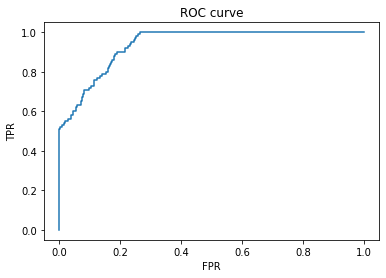

In [ ]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(data.y, data.proba)

0.9377570000000001

### **Issue with AU-ROC**

AU- ROC doesn't work well on extremely imbalanced data.

However, we saw that Precision, recall and F1 score work well on highly imbalanced data.

So, what if we make curve using Precision Recall ? i.e. Precision Recall Curve

<img src='https://drive.google.com/uc?id=1FcWrAX6Aj7gwd-4u-4Z8zerGYm6WcEXT'>



# **Precision - Recall curve**

In Precision Recall curve
- Precision on y axis
- Recall on x axis
- Similar to ROC curve, we'll take each $ŷ_i$ as threshold


The area under this curve is called AU-PRC, Area under precision recall curve, which is a very good metric for very highly imbalanced data.

<img src='https://drive.google.com/uc?id=1yKD_EuZ3CxZRpBYSTcDaZpQtArwIYHMG'>

### Code walkthrough

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
precision, recall, thr = precision_recall_curve(data.y, data.proba)

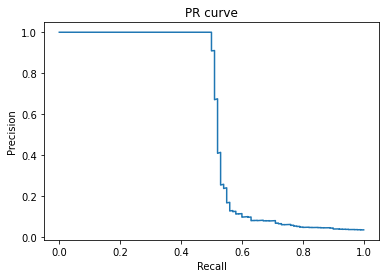

In [ ]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [ ]:
auc(recall, precision)

0.5547651464107343

## Cheat sheat for which metric to use when

- If we want probabilities of classes: Log loss
- If classes are balanced: Accuracy
- IF classes are imbalanced:
    - and if we are more concerned about False positive and true positive, then we use precision.
    - If we are more concerned about False Negatives and True positive then we use recall.
    - F1 score is a balance between precision and recall.
    - If our concern is both classes (true negative and true positive) then we use ROC_AUC
- If severe imbalance : PR AUC

## Performance Metric vs Loss functions

### Q. How are performance metric different than Loss functions?
Loss functions show a measure of model performance. They’re used to train a machine learning model (using some kind of optimization like Gradient Descent), and they’re usually differentiable in the model’s parameters.

Metrics are used to monitor and measure the performance of a model (during training and testing), and don’t need to be differentiable.

However, if for some tasks the performance metric is differentiable, it can also be used as a loss function (perhaps with some regularizations added to it), such as MSE.